<a href="https://colab.research.google.com/github/muhammedkoussa/Supermarket_Sales_Forecast/blob/main/S%C3%BCpermarket_Sat%C4%B1%C5%9F_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammed Koussa -
Normal Öğretim -
19850789563

Bu analizde Store_Area(Mağazanın Fiziksel Alanı), Items_Available(mağazada bulunan farklı ürünlerin sayısı), Daily_Customer_Count(Aylık ortalama olarak mağazaları ziyaret eden müşteri sayısı) ve Store_Sales(Mağazaların yaptığı satışlar) gibi çeşitli bilgiler içeren bir veri kümesini keşfediyoruz. Öncelikli hedefimiz, satış gelirini temsil eden Store_Sales değişkenini tahmin etmektir.


 Bu projede, mağazalar hakkında alan büyüklükleri, mevcut ürünleri ve günlük müşteri sayıları gibi bilgileri içeren bir veri kümesine bakarak bir işletmenin ne kadar satış yapacağını tahmin etmeyi amaçlıyoruz.

  Doğrusal Regresyon, Ridge Regresyon, Lasso Regresyon, Karar Ağacı ve Random Forests gibi çeşitli modeller kullanarak her bir modelin ne kadar iyi performans gösterdiğini karşılaştırıyoruz.

Gereken Kütüphaneler yüklendi.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

veri seti yüklendi.

In [ ]:

data = pd.read_csv('Stores.csv')
#sayı biçimini ayarlandı
pd.options.display.float_format = '{:.2f}'.format #Kayan nokta çıktısını 2 ondalık basamağa sınırlama

In [ ]:
#VERİ sütunları kontrol edildi
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [ ]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
# Mağaza Kimliği sütununu sildim çünkü kullanmayacağız
data = data.drop('Store ID ', axis=1)

1. Keşifsel Veri Seti Analizi

1.1) Veriler Tanımlandı

In [ ]:
data.head().T

,0,1,2,3,4
Store_Area,1659,1461,1340,1451,1770
Items_Available,1961,1752,1609,1748,2111
Daily_Customer_Count,530,210,720,620,450
Store_Sales,66490,39820,54010,53730,46620


In [ ]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(896, 4)
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object
       Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
count      896.00           896.00                896.00       896.00
mean      1485.41          1782.04                786.35     59351.31
std        250.24           299.87                265.39     17190.74
min        775.00           932.00                 10.00     14920.00
25%       1316.75          1575.50                600.00     46530.00
50%       1477.00          1773.50                780.00     58605.00
75%       1653.50          1982.75                970.00     71872.50
max       2229.00          2667.00               1560.00    116320.00


Özet istatistikleri, veri kümesindeki her bir değişkenin dağılımına ilişkin bazı içgörüler sağlar:
Store_Area'nın ortalama değeri 1485,41 ve standart sapması 250,24'tür; bu, mağaza alanlarının boyut olarak nispeten tutarlı olduğunu ve çoğu mağazanın ortalamanın artı veya eksi 250 birim karelik bir aralığına düştüğünü gösterir.
Items_Available'ın ortalama değeri 1782,04 ve standart sapması 299,87'dir; bu, mevcut ürün sayısında bazı farklılıklar olduğunu ancak çoğu mağazanın benzer sayıda mevcut ürüne sahip olduğunu gösterir.
Daily_Customer_Count'un ortalaması 786,35 ve standart sapması 265,39'dur, bu da her gün mağazayı ziyaret eden müşteri sayısında bir miktar değişiklik olduğunu gösterir.
Store_Sales, 59351,31 ortalamaya ve 17190,74 standart sapmaya sahiptir; bu, bazı mağazaların diğerlerinden daha fazla satış yapmasıyla mağaza satışlarında bazı farklılıklar olduğunu gösterir.

1.2)Box plot gösterimi

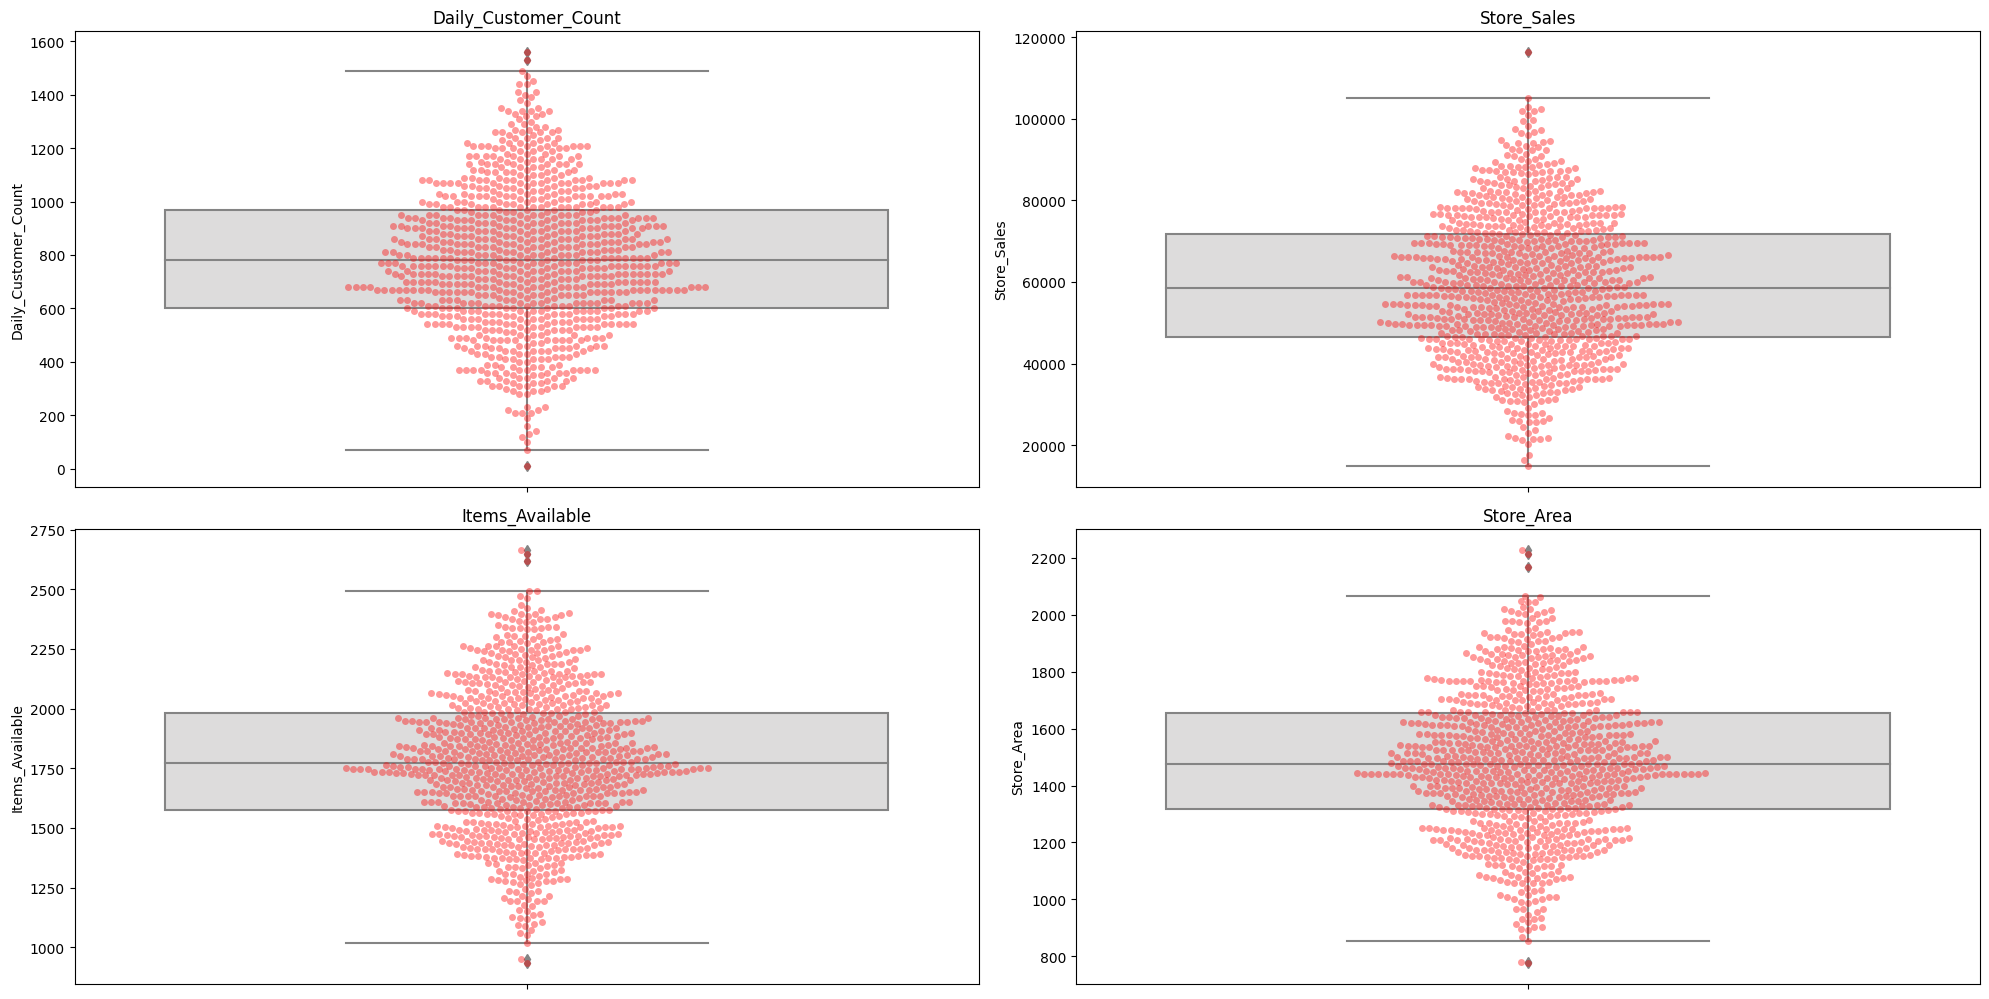

In [ ]:

columns = ['Daily_Customer_Count', 'Store_Sales', 'Items_Available', 'Store_Area']

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns):
    plt.subplot(len(columns), 2, i + 1)
    sns.boxplot(y=column, data=data, palette='coolwarm')
    sns.swarmplot(y=column, data=data, color='red', alpha=0.4)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

1.3) Verilerin dağılım kontrolü

Store_Area: mu = 1485.41, sigma = 250.10
Store_Area: Skewness: 0.03
Store_Area: Kurtosis: -0.28


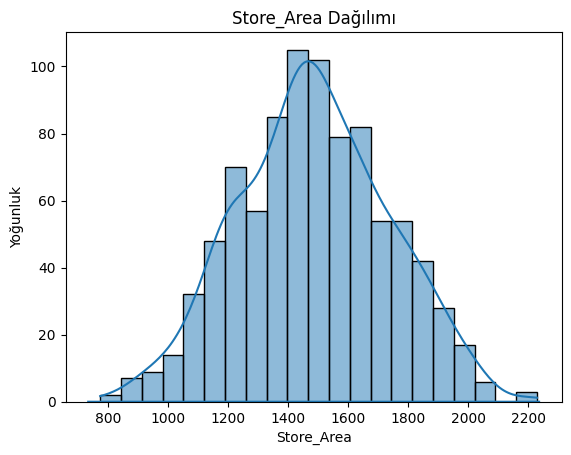

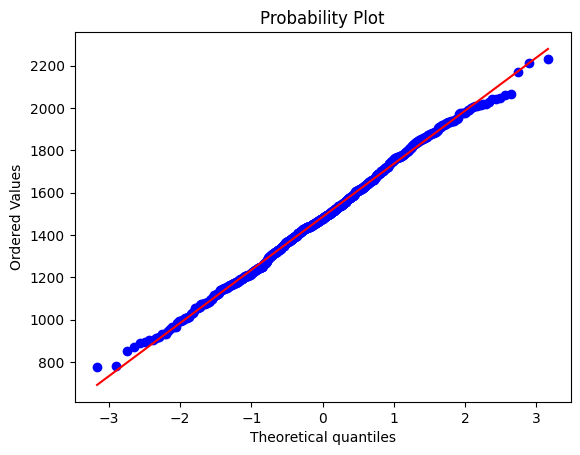

Items_Available: mu = 1782.04, sigma = 299.70
Items_Available: Skewness: 0.03
Items_Available: Kurtosis: -0.28


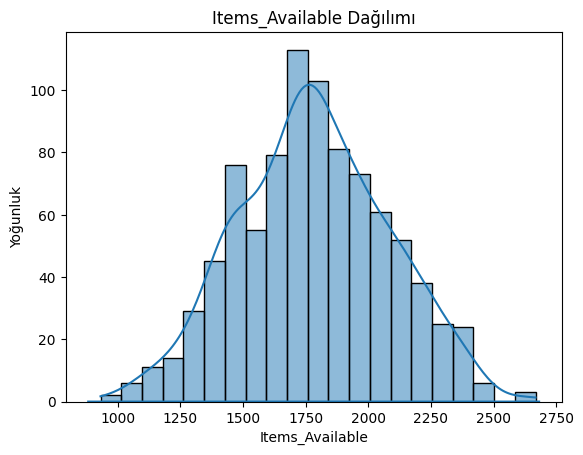

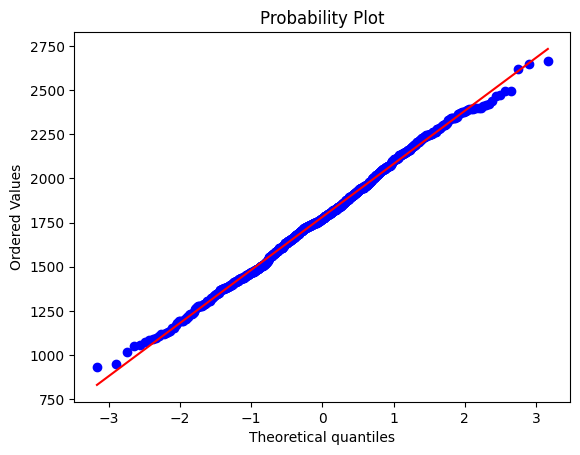

Daily_Customer_Count: mu = 786.35, sigma = 265.24
Daily_Customer_Count: Skewness: 0.07
Daily_Customer_Count: Kurtosis: -0.26


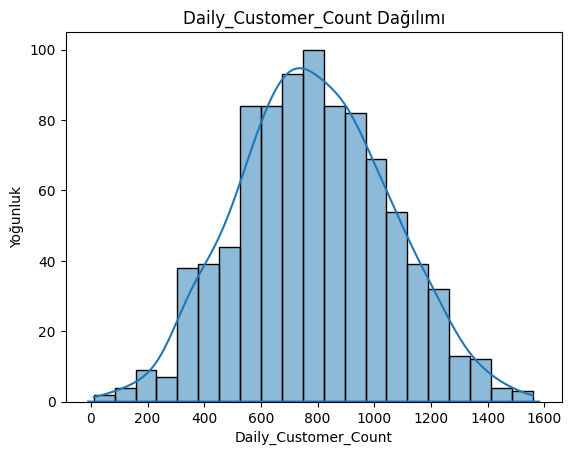

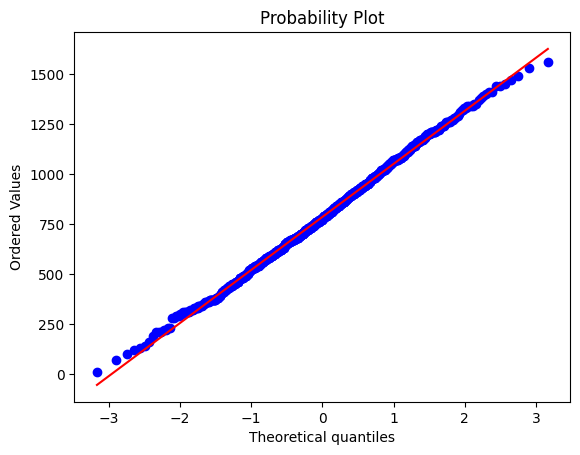

Store_Sales: mu = 59351.31, sigma = 17181.15
Store_Sales: Skewness: 0.15
Store_Sales: Kurtosis: -0.46


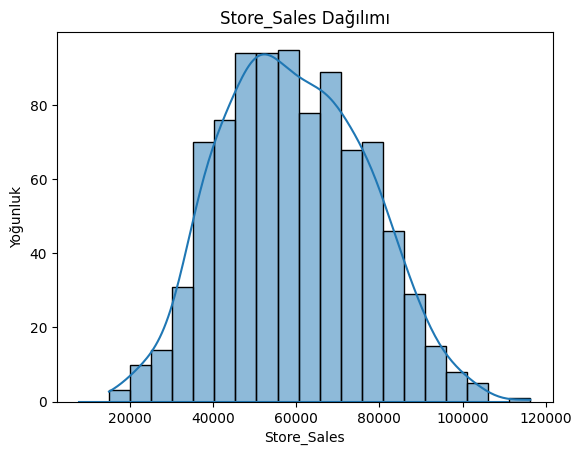

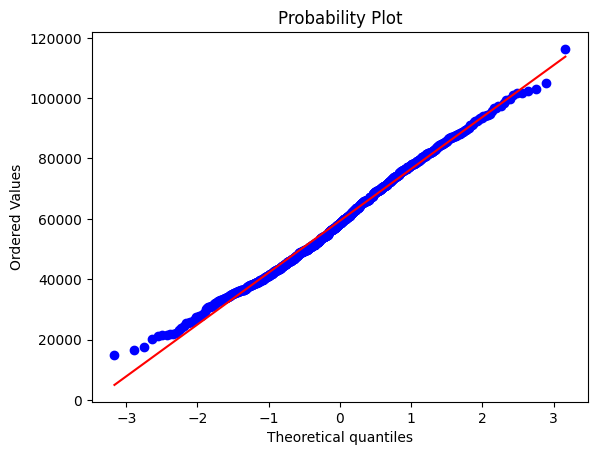

In [ ]:
# Analiz etmek istediğimiz sütunları seçiyoruz
columns = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

# Sütunlar üzerinde döngü yapın ve her değişkenin dağılımını çizin
for column_name in columns:
    # Verilerin dağılımını çizme
    sns.histplot(data[column_name], kde=True)

    # Verilere normal dağılım sığdırma
    (mu, sigma) = stats.norm.fit(data[column_name])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(column_name, mu, sigma))

    # Verilerin çarpıklığını ve basıklığını hesaplayın
    print('{}: Skewness: {:.2f}'.format(column_name, data[column_name].skew()))
    print('{}: Kurtosis: {:.2f}'.format(column_name, data[column_name].kurt()))

    # Çizime uygun normal dağılımı ekleyin
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Çizime etiketler ve başlık ekleyin
    plt.xlabel(column_name)
    plt.ylabel('Yoğunluk')
    plt.title("{column_name} Dağılımı".format(column_name = column_name))

    # QQ grafiğini çizin
    fig = plt.figure()
    stats.probplot(data[column_name], plot=plt)

    plt.show()

Normal dağılım olduğu görülüyor.

Mağaza_Alanı: Ortalama mağaza alanı 1485,41 birim kare, standart sapması 250,10'dur. Bu, mağaza alanlarının boyut olarak göreceli olarak tutarlı olduğunu ve çoğunun ortalamanın artı veya eksi 250 birim karelik bir aralığına düştüğünü gösterir. Bununla birlikte, veriler biraz düzdür, bu da mağaza alanında çok fazla varyasyon olmadığı anlamına gelir.
Items_Available: Mağazada bulunan ortalama ürün sayısı 1782,04 ve standart sapma 299,70'dir. Bu, mevcut ürün sayısında bazı farklılıklar olduğunu gösterir, ancak çoğu mağazada benzer sayıda ürün bulunur. Veriler de biraz düz olup, mevcut öğelerin sayısında çok fazla değişiklik olmadığını gösterir.
Daily_Customer_Count: Ortalama günlük müşteri sayısı 786,35 ve standart sapma 265,24'tür. Bu, her gün mağazayı ziyaret eden müşteri sayısında bir miktar değişiklik olduğunu ve verilerin biraz sağa çarpık olduğunu, bu da bazı mağazaların diğerlerinden daha fazla müşteriye sahip olabileceği anlamına gelir.
Store_Sales: Ortalama mağaza satışları 59351,31 ve standart sapması 17181,15'tir. Bu, mağaza satışlarında bazı değişikliklerin olduğunu, bazı mağazaların diğerlerinden daha fazla satış yaptığını gösterir. Veriler biraz sağa çarpık, bu da bazı mağazaların diğerlerinden daha fazla satış yapabileceği anlamına geliyor.

1.4) Korelasyon

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.00,1.00,-0.04,0.10
Items_Available,1.00,1.00,-0.04,0.10
Daily_Customer_Count,-0.04,-0.04,1.00,0.01
Store_Sales,0.10,0.10,0.01,1.00


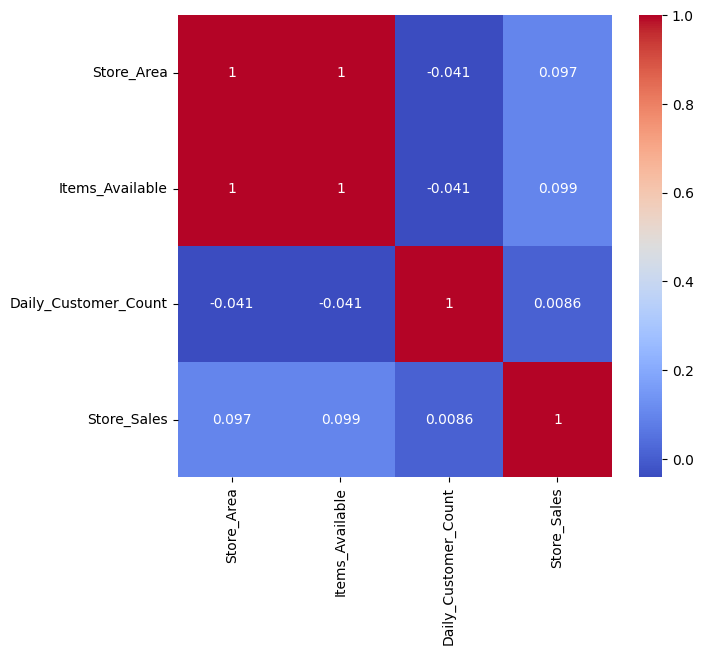

In [ ]:

plt.figure(figsize=(7,6))
correlation = data.corr()
sns.heatmap(correlation,cmap="coolwarm",annot=True)
correlation

Korelasyon matrisi, verilerdeki her bir değişken çiftinin birbiriyle ne kadar güçlü bir şekilde ilişkili olduğunu gösterir. 1 değeri, iki değişkenin mükemmel pozitif korelasyona sahip olduğu, 0 değeri korelasyon olmadığı ve -1 değeri, iki değişkenin mükemmel negatif korelasyona sahip olduğu anlamına gelir.
Korelasyon matrisine bakıldığında, işte bazı gözlemler:
**Store_Area ve Items_Available birbirleriyle mükemmel pozitif korelasyona sahiptir** (1'lik korelasyon katsayısı), bu mantıklıdır, çünkü daha büyük mağazalar tipik olarak daha fazla ürün tutabilir.
**Daily_Customer_CountandStore_Sales çok zayıf bir pozitif korelasyona sahiptir (0,01 korelasyon katsayısı), bu da günlük müşteri sayısının mağazanın satışlarıyla güçlü bir şekilde ilişkili olmadığını gösterir.**
**Store_Area ve Store_Sales arasında zayıf bir pozitif korelasyon vardır (korelasyon katsayısı 0,10), bu da daha büyük mağazaların biraz daha fazla satış yapabileceğini gösterir.** Tüm değişkenlerin birbiriyle çok zayıf korelasyonları vardır ve korelasyon katsayıları -0,04 ile 0,10 arasındadır.
Genel olarak, dört değişken arasındaki korelasyonlar zayıftır, yani birbirleriyle güçlü bir şekilde ilişkili değildirler. Bu, çoklu bağlantı hakkında endişelenmeden (iki veya daha fazla değişken birbiriyle yüksek oranda ilişkili olduğunda meydana gelebilir) mağaza satış tahmin modelindeki dört değişkenin tümünü kullanmayı düşünebileceğimiz anlamına gelir.

1.5) Kümeleme analizi

 mağaza alanı ile satışlar arasındaki ilişki

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


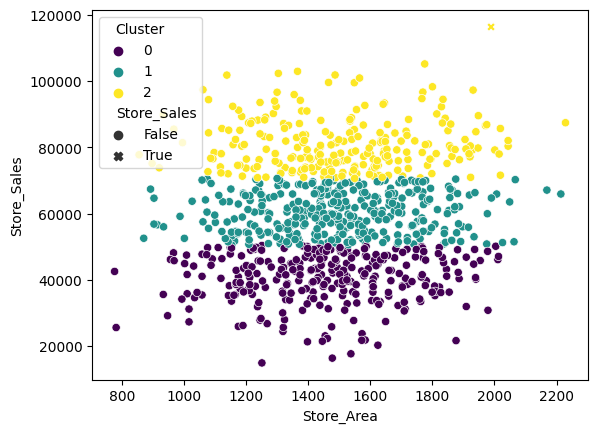

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


cluster_data = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(cluster_data)

sns.scatterplot(x='Store_Area', y='Store_Sales', data=data, hue='Cluster', palette='viridis', style=outlier_mask['Store_Sales'])
plt.show()

Kümeleme analizi, mağazaların özellikleri ile satışları arasındaki ilişkiyi anlamamıza yardımcı olur. Mağaza alanı ve günlük müşteri sayısı gibi özelliklerine göre mağazaları gruplandırmak için K-means kümeleme adı verilen bir yöntem kullanır. Fikir, satışlarını tahmin etmede yararlı olabilecek herhangi bir mağaza modelini veya mağaza grubunu belirlemektir.

İlk olarak kod, verilerde sonuçları çarpıtabilecek tüm aykırı değerleri tanımlar. Ardından, verilerin en ilgili dört sütununu seçer ve benzer depoları birlikte gruplandırmak için K-means kümeleme yöntemini uygular. Sonuçlar orijinal veri kümesine "Küme" adı verilen yeni bir sütun olarak eklenir.

Son olarak kod, mağaza alanı ile satışlar arasındaki ilişkiyi görselleştirmek için bir dağılım grafiği oluşturur. Çizimdeki her nokta bir mağazayı, rengi ise ait olduğu grubu temsil eder. Çizim, farklı mağaza gruplarının satış açısından nasıl performans gösterdiğini ve nitelikleri ile satışları arasında herhangi bir korelasyon olup olmadığını anlamamıza yardımcı olur.

Bu kod, verilerdeki kalıpları veya grupları belirleyip görselleştirerek mağaza satışlarını etkileyen faktörler hakkında fikir edinmemize yardımcı olur.

1.6) Joint Plot

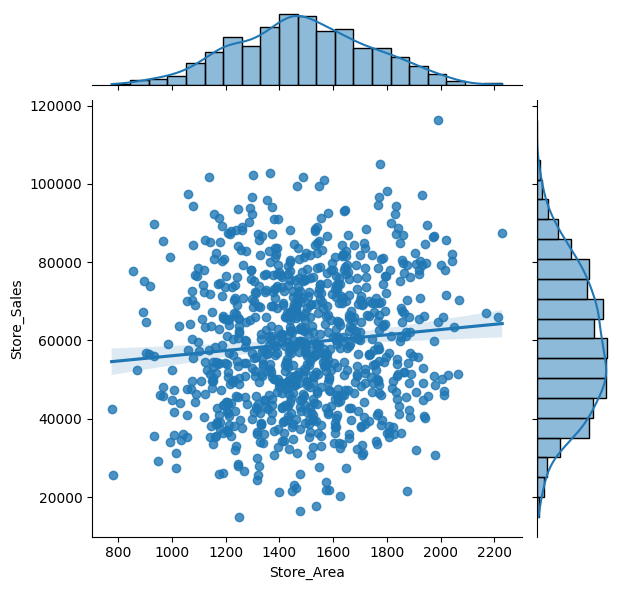

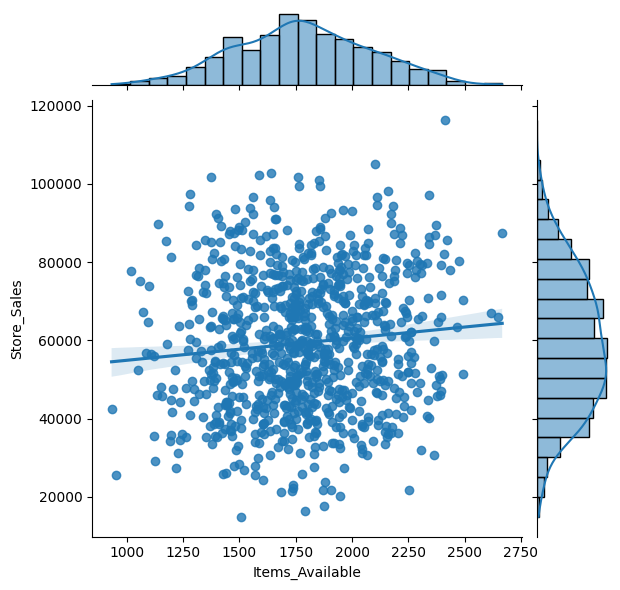

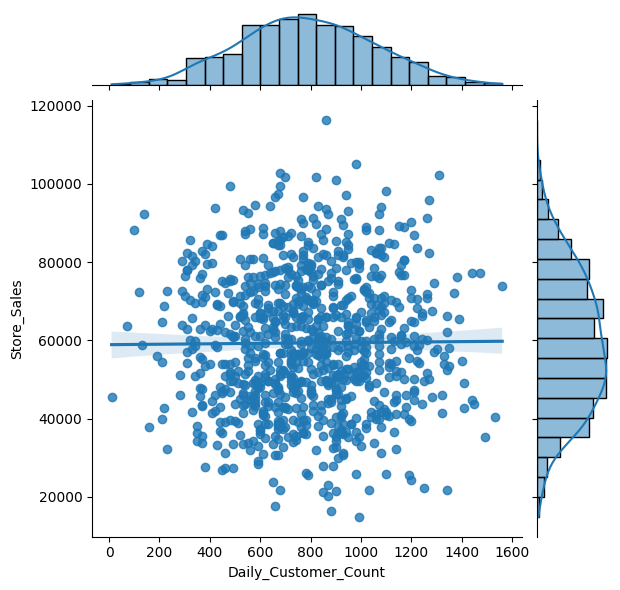

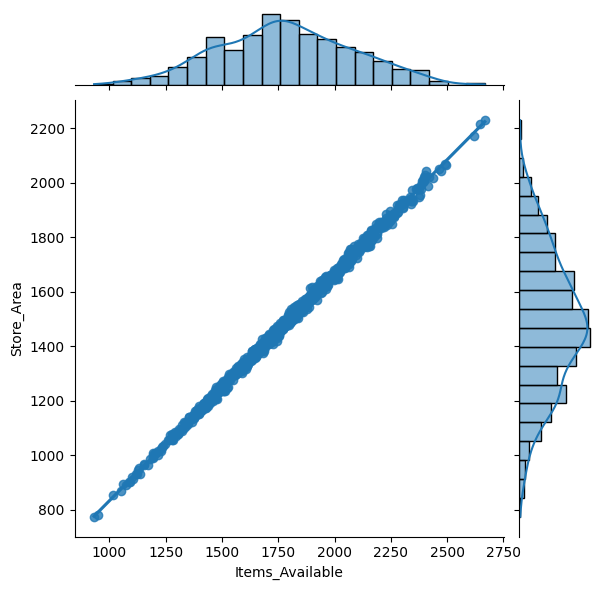

In [ ]:
sns.jointplot(x='Store_Area', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Items_Available', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Daily_Customer_Count', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Items_Available', y='Store_Area', data=data, kind='reg')

plt.show()

İlk dağılım grafiği, mağaza alanı ile mağaza satışları arasındaki ilişkiyi gösterir. Regresyon çizgisi, korelasyon matrisindeki 0,10'luk korelasyon katsayısı ile tutarlı olan iki değişken arasında pozitif bir korelasyon göstermektedir.

İkinci dağılım grafiği, mevcut ürünler ile mağaza satışları arasındaki ilişkiyi gösterir. Yine değişkenler arasında 0,10 olan korelasyon katsayısı ile uyumlu pozitif bir korelasyon vardır.

Üçüncü dağılım grafiği, günlük müşteri sayısı ile mağaza satışları arasındaki ilişkiyi gösterir. Bu durumda, korelasyon çok zayıftır (0,01 korelasyon katsayısı) ve regresyon çizgisi neredeyse düzdür, bu da iki değişken arasında çok az ilişki olduğunu gösterir.

Dördüncü dağılım grafiği, mevcut ürünler  ile mağaza alanı arasındaki ilişkiyi gösterir. Beklendiği gibi, iki değişken mükemmel bir pozitif korelasyona sahiptir (1'lik korelasyon katsayısı) ve regresyon çizgisi mükemmel bir çapraz çizgidir.

Genel olarak, bu dağılım grafikleri, mağazaların farklı özelliklerinin birbirleriyle ve mağaza satışlarıyla nasıl ilişkili olduğunu anlamamıza yardımcı olur. Doğrusal regresyon çizgilerinin kullanılması, değişkenler arasındaki korelasyonların gücünü ve yönünü görselleştirmeye ve verilerdeki potansiyel aykırı değerleri veya olağandışı kalıpları belirlemeye yardımcı olur. Korelasyon matrisi, her bir değişken çifti arasındaki korelasyonların gücü ve yönü hakkında daha fazla analize rehberlik etmek için kullanılabilecek ek bilgiler sağlar.

2.  Veri Temizleme ve Veri Hazırlama

2.1) Boş ve Eksik Değerleri Kontrolü

In [ ]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


Bu veri kümesinde boş değer yok

2.2) Tekrar eden veri kontrolü

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 5)


Bu veri kümesinde tekrar eden değer yok

2.3) Aykırı Değerleri Ele Alma

Outliers in Store_Area: [2169, 775, 2229, 2214, 780]


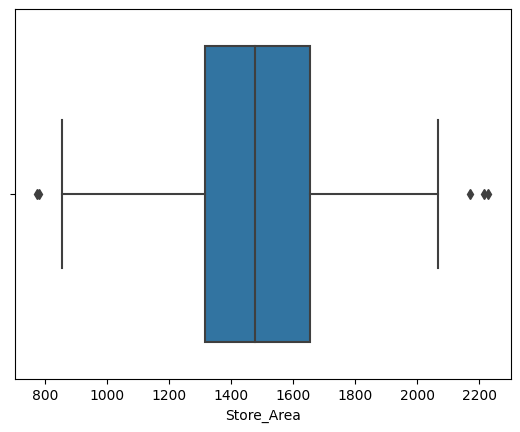

Outliers in Items_Available: [2617, 932, 2667, 2647, 951]


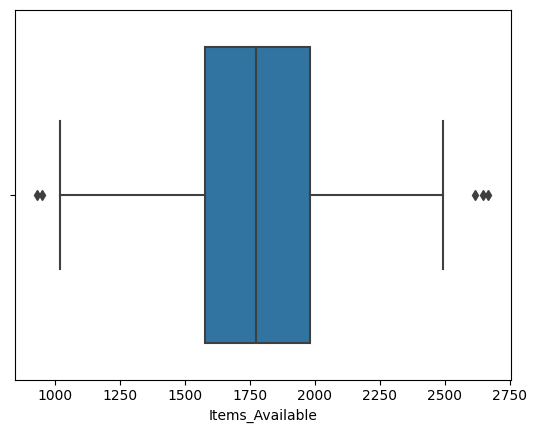

Outliers in Daily_Customer_Count: [10, 1530, 1560]


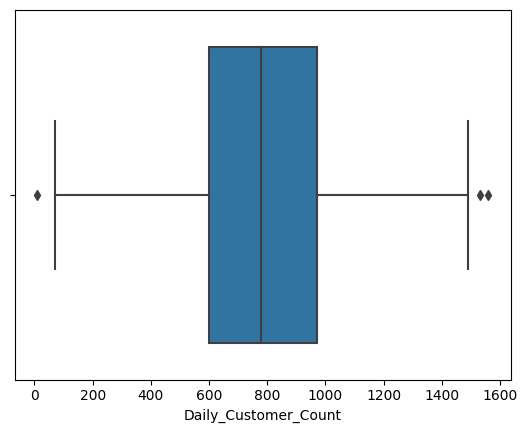

Outliers in Cluster: []


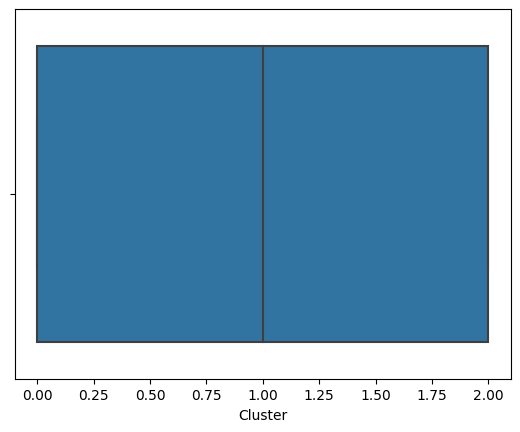

In [ ]:
# Step 3: Aykırı Değerleri Ele Alma
# Kutu grafikleri oluşturun ve her değişken için aykırı değerleri yazdırın
for column_name in data.columns:
    if column_name != 'Store_Sales':
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (data[column_name] < (Q1 - 1.5 * IQR)) | (data[column_name] > (Q3 + 1.5 * IQR))
        outliers = data[outlier_mask][column_name].tolist()
        print(f"Outliers in {column_name}: {outliers}")
        sns.boxplot(x=data[column_name])
        plt.show()

2.4) Aykırı değerleri kaldırma

In [ ]:
# Store_Area ve Items_Available'dan aykırı değerleri kaldırıldı
Q1 = data['Store_Area'].quantile(0.25)
Q3 = data['Store_Area'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Store_Area'] < (Q1 - 1.5 * IQR)) | (data['Store_Area'] > (Q3 + 1.5 * IQR)))]

Q1 = data['Items_Available'].quantile(0.25)
Q3 = data['Items_Available'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Items_Available'] < (Q1 - 1.5 * IQR)) | (data['Items_Available'] > (Q3 + 1.5 * IQR)))]

Bu durumda, her değişkenin dağılımını görselleştirmek ve aykırı değerleri belirlemek için kutu grafikleri kullandık. Daha sonra, verilerin yayılmasının bir ölçüsü olan her değişken için çeyrekler arası aralığı (IQR) hesapladık. Verilerin üst veya alt çeyreğinden IQR'nin 1,5 katından fazla uzakta olan veri noktalarını belirlemek için IQR'yi kullandık ve bunları aykırı değerler olarak işaretledik.

Aykırı değerler, istatistiksel analizler ve makine öğrenimi modelleri üzerinde önemli bir etkiye sahip olabilir. Verilerin dağılımını çarpıtabilir ve modelin yanlış tahminler veya tahminler yapmasına neden olabilirler. Bu nedenle, aykırı değerleri uygun şekilde ele almak önemlidir.

Bu durumda, Store_Area ve Items_Available için aykırı değerleri kaldırmaya karar verdik, çünkü bunların sayısı görece azdı ve verilerin çoğunu temsil etmesi pek olası olmayan uç değerler gibi görünüyordu. Bu aykırı değerleri kaldırarak, analiz ve modellerimizin doğruluğunu ve güvenilirliğini artırabiliriz. Ancak, Daily_Customer_Count için aykırı değerleri kaldırmadık çünkü bunlardan yalnızca birkaçı vardı ve verilerin çoğunu temsil etmesi muhtemel olmayan uç değerler gibi görünmüyorlardı.

In [ ]:

#veri setinde kategorik değişken yok

3. TAHMİN

5 Farklı Model

Doğrusal Regresyon: Doğrusal Regresyon, girdi özellikleri ile çıktı arasındaki ilişkiyi en iyi şekilde temsil eden düz bir çizgi bulmak için kullanılan temel bir yöntemdir. Örneğin, metrekare bazında ev fiyatlarını tahmin etmek istiyorsak, Doğrusal Regresyon gerçek ve tahmin edilen fiyatlar arasındaki farkı en aza indiren bir çizgi bulur.

Ridge Regresyon: Ridge Regresyon, Lineer Regresyona benzer, ancak aşırı uyumu önlemek için büyük ağırlıklar için bir ceza ekler. Örneğin, Ridge Regression, metrekare, yatak odası sayısı ve konum gibi birden çok özelliğe dayalı olarak ev fiyatlarını tahmin ederken, modeli basit tutarken her bir özelliğin önemini dengelemeye yardımcı olur.

Lasso Regresyon: Lasso Regresyon, büyük ağırlıklar için bir ceza ekleyen ancak aynı zamanda bazı ağırlıkların tam olarak sıfır olmasını teşvik eden bir başka Doğrusal Regresyon çeşididir. Bu, tahmin için yalnızca önemli özelliklerin seçilmesine yardımcı olur. Örneğin, Lasso Regression birçok özelliği kullanarak ev fiyatlarını tahmin ederken, metrekare ve konum gibi yalnızca birkaç özelliğin alakalı olduğunu bulabilir ve diğer özelliklerin ağırlıklarını sıfıra ayarlayabilir.italik metin

Karar Ağacı: Karar Ağacı, çıktıyı tahmin etmek için girdi özelliklerine dayalı kararlar veren akış şeması benzeri bir yapıdır. Örneğin, ev fiyatlarını tahmin ederken, bir Karar Ağacı fiyata karar vermek için önce konumu, ardından metrekareyi kontrol edebilir. Karar Ağaçlarının anlaşılması kolaydır, ancak kontrol edilmezlerse fazla uydurmaya eğilimli olabilirler.

Random Forests: Random Forests, daha iyi tahminler yapmak için birlikte çalışan bir Karar Ağaçları grubudur. Her ağaç, genel modelin daha iyi genelleştirilmesine yardımcı olan verilerin ve özelliklerin rastgele alt kümelerinden oluşturulur. Bir Rastgele Orman, ev fiyatlarını tahmin ederken, her biri verilerin farklı yönlerine odaklanan birden fazla Karar Ağacı kullanır ve ardından daha doğru bir sonuç için tahminlerinin ortalamasını alır.

In [ ]:
# Veri kümesini bölme
X = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = data['Store_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.1) Modelleri tanımlama

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(alpha=1.0, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [ ]:
# Modeller eğitim ve hata hesaplama
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results)

3.2) Gerçek ve tahmin edilen değerlerin dağılım grafiği

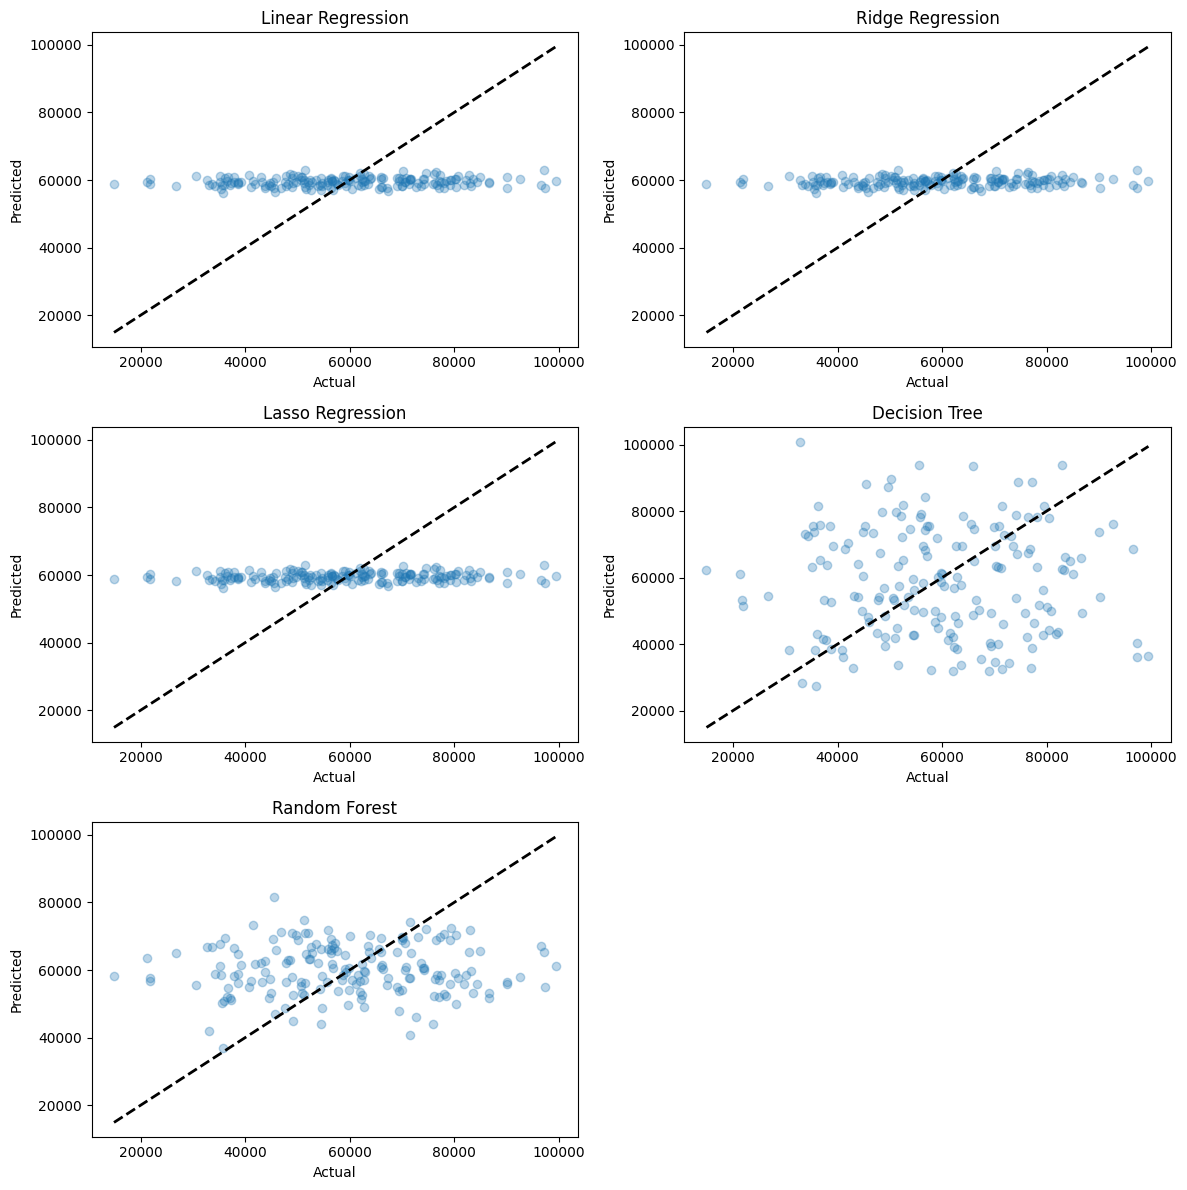

In [ ]:
# Gerçek ve tahmin edilen değerlerin dağılım grafiği
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axes[i].scatter(y_test, y_pred, alpha=0.3)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[i].set_xlabel("Gerçek")
    axes[i].set_ylabel("Tahmin")
    axes[i].set_title(f"{name}")

# Fazladan alt grafiği kaldırıldı
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

3.3) Karşılaştırma Tablosu

In [ ]:

pd.set_option("display.precision", 2)
display(results_df.set_index("Model"))

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,13689.23,282626338.70,16811.49,0.01
Ridge Regression,13689.23,282626313.36,16811.49,0.01
Lasso Regression,13689.22,282626032.81,16811.49,0.01
Decision Tree,18696.20,553061931.84,23517.27,-0.93
Random Forest,14756.47,334135480.73,18279.37,-0.17


sonuçlara baktığımızda Lineer regresyon, Ridge regresyon ve Lasso regresyonun benzer bir performansa sahip olduğu gözlemleniyor.
Bu modellerin ortalama mutlak hatası ( MAE) , Ortalama kare hatası(MSE) ve kök ortalama kare hatası (RMSE) Düşük olduğu gözlemleniyor.
mağaza satışlarını tahmin etmek için bu 3 modeli kullanabiliriz

4. Sonuç


Doğrusal Regresyon:

R-kare puanı, hedef değişkendeki girdi özelliklerinden tahmin edilebilen varyans oranını temsil eder. Puan 0 ile 1 arasında değişir ve 1 mükemmel uyum anlamına gelir. 0,01 puan, doğrusal regresyon modelinin verilerdeki varyansın yalnızca %1'ini açıkladığını gösterir.

Ridge Regresyon:

Ridge Regresyon modeli, Lineer Regresyon modeline çok benzer performans ölçümlerine sahiptir. Bunun nedeni, Ridge Regresyon'un, fazla uydurmayı önlemeye çalışan doğrusal regresyona uygulanan bir düzenleme tekniği olmasıdır, ancak bu durumda, modelin performansı üzerinde önemli bir etkisi yok gibi görünmektedir.

Lasso Regresyon:

Ridge Regresyona benzer şekilde, Kement Regresyon, doğrusal regresyona uygulanan başka bir düzenlileştirme tekniğidir. Kement Regresyon modelinin performansı da Lineer Regresyon modeline oldukça benzer.

Karar ağacı:

Negatif R-kare puanı, modelin basit bir ortalama tabanlı modelden daha kötü performans gösterdiğini gösterir. Bu, karar ağacı modelinin bu veri seti için uygun olmadığını göstermektedir.

Random Forests:

Karar Ağacı modeline benzer şekilde, negatif R-kare puanı, Random Forests modeli için düşük performansı gösterir.

**Sonuçlardan, Lineer Regresyon, Ridge Regresyon ve Lasso Regresyon'un benzer performansa sahip olduğu gözlemlenebilir. Bu modeller en düşük MAE, MSE ve RMSE değerlerine sahiptir ve bu da en iyi genel öngörü doğruluğuna sahip olduklarını gösterir.** Ancak, bu modeller için R-kare değerleri çok düşüktür (0'a yakın), bu da bunların mağaza satışlarındaki değişkenliğin yalnızca küçük bir kısmını açıkladığını düşündürür.

Karar Ağacı ve Rastgele Orman modelleri, daha yüksek MAE, MSE ve RMSE değerleri ile doğrusal modellere kıyasla daha kötü performansa sahiptir. Özellikle Karar Ağacı modelinin negatif bir R-kare değeri vardır, bu da modelin basit bir ortalamaya dayalı tahminden daha kötü performans gösterdiğini gösterir.

-Bu sonuçlara dayanarak, mağaza satışlarını tahmin etmek için Doğrusal Regresyon, Ridge Regresyon veya Lasso Regresyon kullanmayı düşünebiliriz.